# Business problem
#### The Sentimental Analysis of the Customer reviews from Amazon Website about the apple iphone 12  mobile phone.

<img src="https://img2.cgtrader.com/items/2688387/b14729951e/apple-iphone-12-blue-3d-model-low-poly-max-obj-fbx-c4d.jpg" style="width: 700px;">

In [24]:
   from bs4 import BeautifulSoup
import requests
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

In [7]:
data=pd.read_csv("c:\\Users\\HP\\Documents\\kaggle\\project Data Science\\Untitled Folder\\reviewsiphone12.csv",index_col=0)

In [8]:
data.head()

,name,rating,review
0,Amazon Customer,4.0 out of 5 stars,"\n\n Sold kidney bought this, now not feeling..."
1,Akash Sinha,3.0 out of 5 stars,\n\n Worst battery performance.Iphone 11 is f...
2,S.Siva Ram Kris,5.0 out of 5 stars,\n\n\n\n\n The media could ...
3,Anupam,1.0 out of 5 stars,\n\n Extremely disappointed with this phone. ...
4,Paras,5.0 out of 5 stars,\n\n This was my first switch to an ios devic...


In [5]:
#data=data.drop("Unnamed: 0", axis=1)

In [10]:
data["Rating"]= data["rating"].apply(lambda x : int(x[0]))
data.drop("rating", axis=1, inplace=True)
review=data.drop("name",axis=1)
review=review.rename({'review ':'Review'},axis=1)
review.head()

,Review,Rating
0,"\n\n Sold kidney bought this, now not feeling...",4
1,\n\n Worst battery performance.Iphone 11 is f...,3
2,\n\n\n\n\n The media could ...,5
3,\n\n Extremely disappointed with this phone. ...,1
4,\n\n This was my first switch to an ios devic...,5


In [11]:
review["sentiment"]= review["Rating"].map({1: -1, 2:-1, 4: 1, 5:1})

In [12]:
review=review.dropna()

<AxesSubplot:ylabel='Rating'>

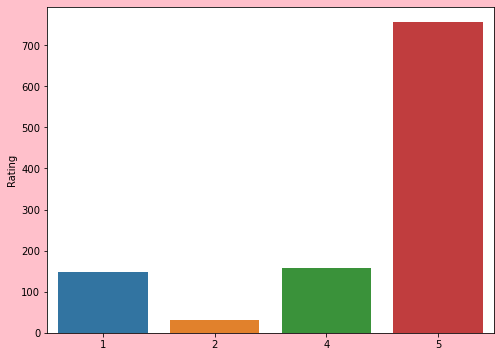

In [13]:
plt.figure(figsize=(8,6),facecolor='pink')
sns.barplot(x=review.Rating.value_counts().index, y=review.Rating.value_counts())

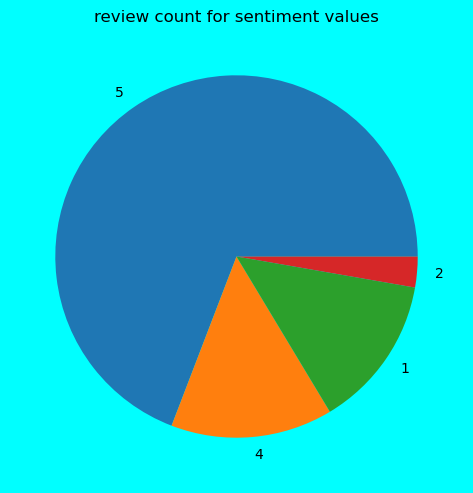

In [14]:
plt.figure(figsize=(8,6),dpi=100,facecolor='cyan')
plt.pie(review.Rating.value_counts(), labels=review.Rating.value_counts().index)
plt.title("review count for sentiment values")
plt.show()

<AxesSubplot:ylabel='sentiment'>

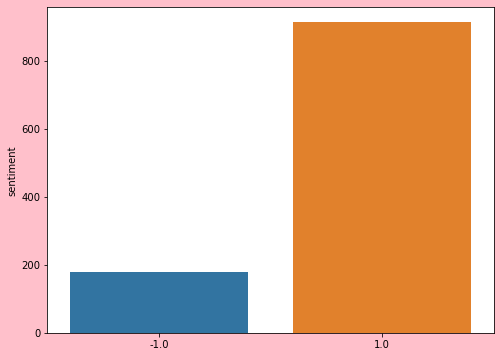

In [15]:
plt.figure(figsize=(8,6),facecolor='pink')
sns.barplot(x=review.sentiment.value_counts().index, y=review.sentiment.value_counts())

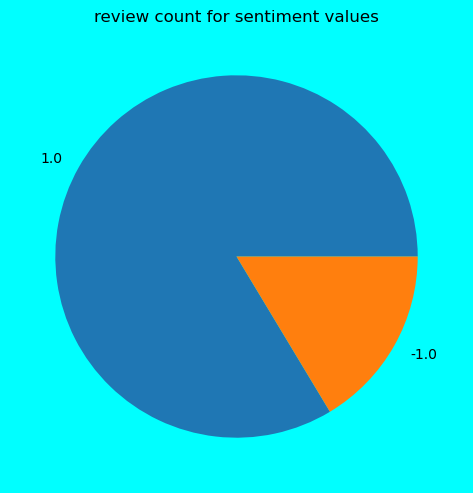

In [16]:
plt.figure(figsize=(8,6),dpi=100,facecolor='cyan')
plt.pie(review.sentiment.value_counts(), labels=review.sentiment.value_counts().index)
plt.title("review count for sentiment values")
plt.show()

In [17]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*\n\n\n*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    text = text.strip('\n')
    return text

clean = lambda x: clean_text(x)

In [18]:
review['Review']=review['Review'].apply(lambda x: clean(str(x)))

In [19]:
neg_review=review[review['sentiment']<=0]

In [20]:
pos_review=review[review['sentiment']>=0]

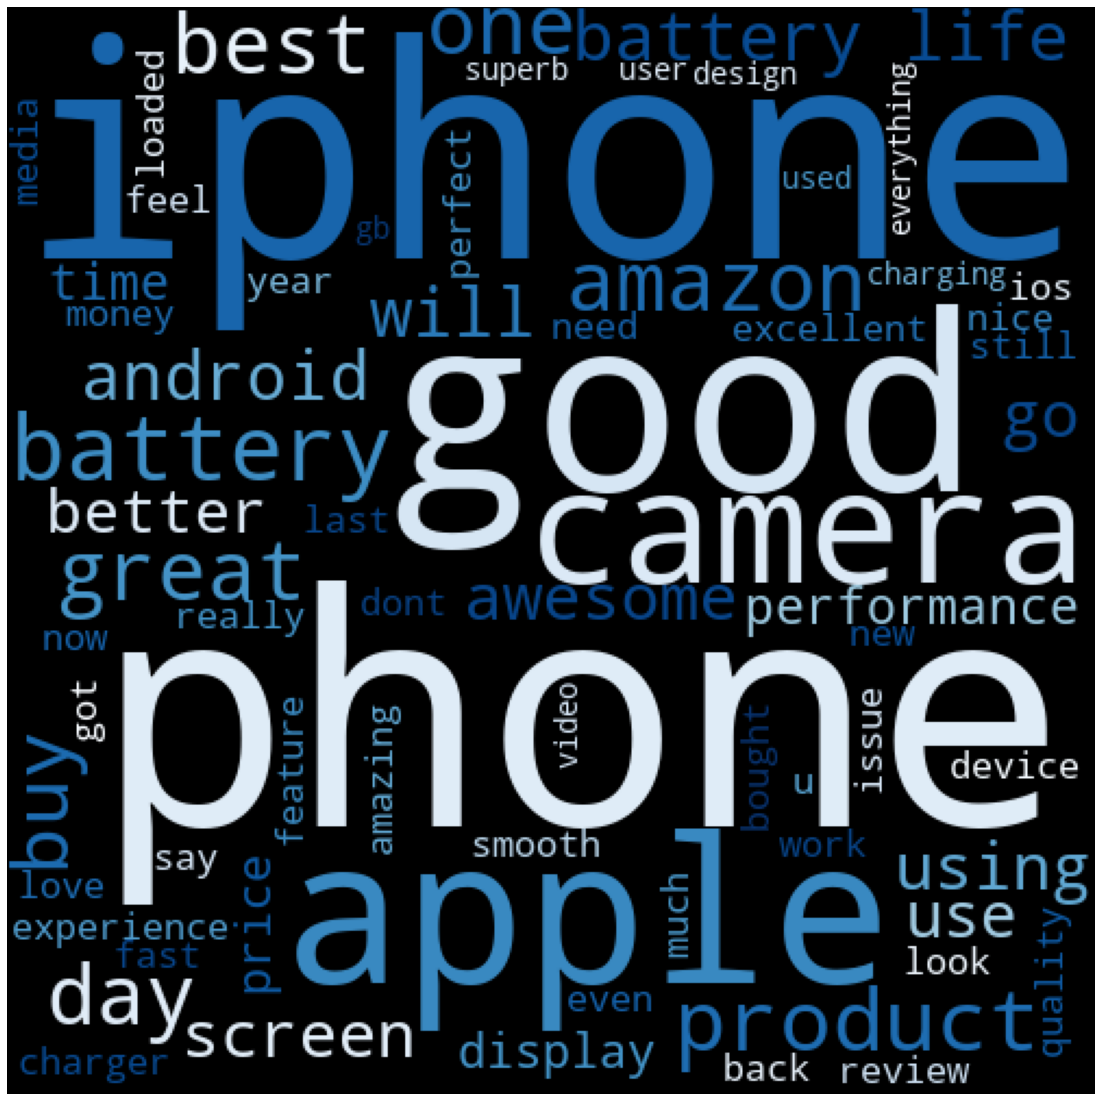

In [21]:
txt = ' '.join(review for review in review.Review)

def plot_cloud(wordcloud):
    plt.figure(figsize=(30,20))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=500,height=500,background_color='black',max_words=70,
                   colormap='Blues',stopwords=STOPWORDS).generate(txt)
plot_cloud(wordcloud)

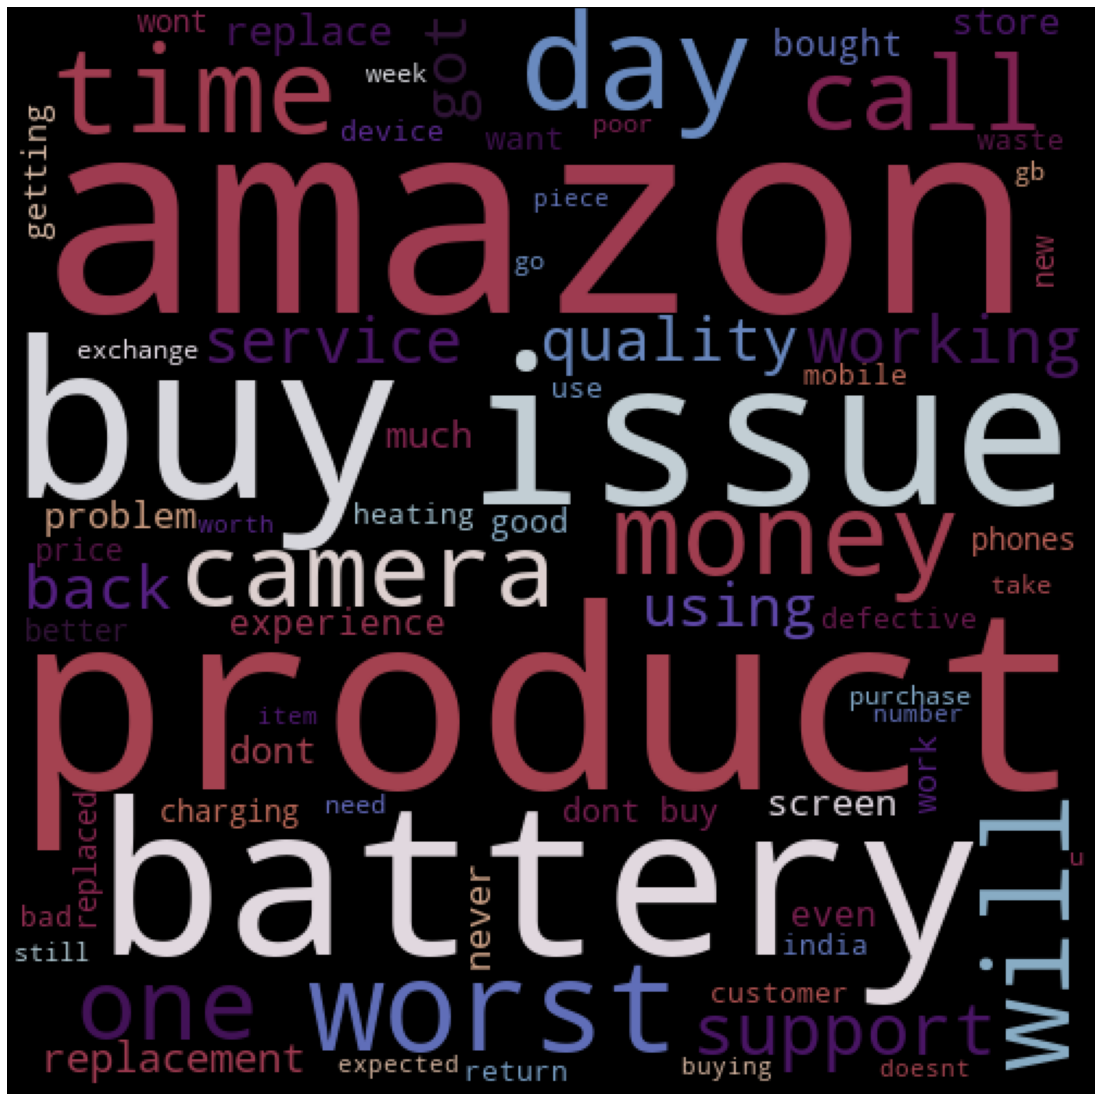

In [22]:
txt = ' '.join(review for review in neg_review.Review)

def plot_cloud(wordcloud):
    plt.figure(figsize=(30,20))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
STOPWORDS.add('phone')
STOPWORDS.add('apple')
STOPWORDS.add('iphone')
wordcloud=WordCloud(width=500,height=500,background_color='black',max_words=70,
                   colormap='twilight_shifted',stopwords=STOPWORDS).generate(txt)
plot_cloud(wordcloud)

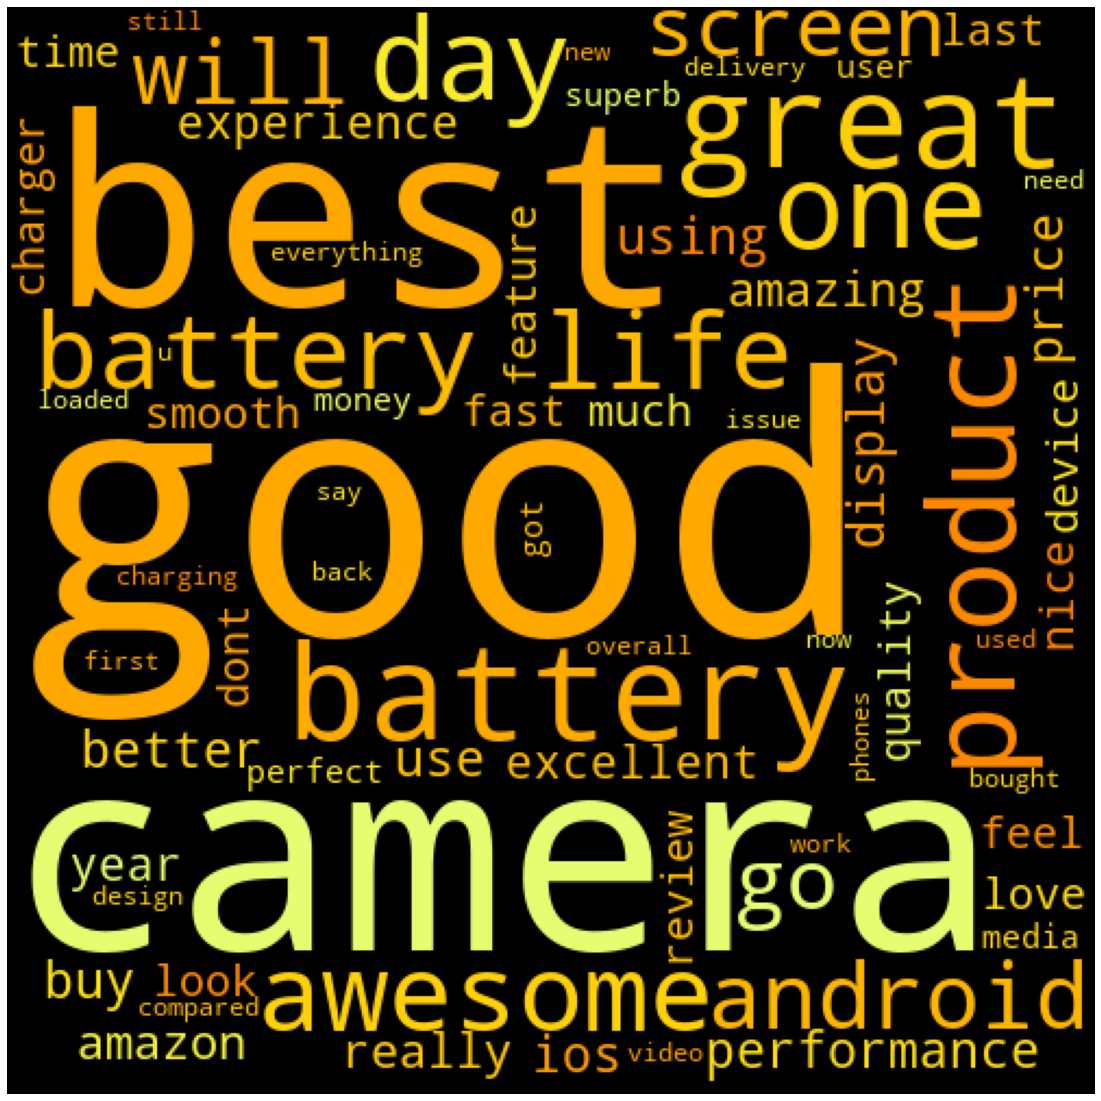

In [23]:
txt = ' '.join(review for review in pos_review.Review)

def plot_cloud(wordcloud):
    plt.figure(figsize=(30,20))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
STOPWORDS.add('phone')
STOPWORDS.add('apple')
STOPWORDS.add('iphone')
wordcloud=WordCloud(width=500,height=500,background_color='black',max_words=70,
                   colormap='Wistia',stopwords=STOPWORDS).generate(txt)
plot_cloud(wordcloud)

In [25]:
def findpolarity (txt):
    blob=TextBlob(txt)
    sentiment=blob.polarity
    return sentiment

In [26]:
review['polarity']=review['Review'].apply(findpolarity)

In [27]:
review

,Review,Rating,sentiment,polarity
0,sold kidney bought this now not feeling well...,4,1.0,0.255000
2,the media could not be loa...,5,1.0,0.182893
3,extremely disappointed with this phone its a...,1,-1.0,-0.093841
4,this was my first switch to an ios device af...,5,1.0,0.365625
5,if you are planning to buy an iphone then pl...,1,-1.0,-0.100000
...,...,...,...,...
1181,good but not good as iphone pro nice flag...,5,1.0,0.310000
1182,well organized and easy to understand web bu...,4,1.0,0.433333
1183,phone is good nice performance also wellbut ...,4,1.0,0.650000
1184,i have always wanted to have a iphone but s...,5,1.0,-0.084697


In [28]:
review['sentiments']=review['polarity'].apply(lambda x : 1 if (x>=0) else 0)

In [30]:
review.head(20)

,Review,Rating,sentiment,polarity,sentiments
0,sold kidney bought this now not feeling well...,4,1.0,0.255000,1
2,the media could not be loa...,5,1.0,0.182893,1
3,extremely disappointed with this phone its a...,1,-1.0,-0.093841,0
4,this was my first switch to an ios device af...,5,1.0,0.365625,1
5,if you are planning to buy an iphone then pl...,1,-1.0,-0.100000,0
6,hello therei am writing this review after ...,4,1.0,-0.050595,0
7,nicely packed kudos to seller i was very mu...,5,1.0,0.378515,1
8,i have been an android user for the past y...,4,1.0,0.206491,1
9,i am writing this review after days of use...,4,1.0,0.334583,1
10,after thinking a lot i decided to go ahead w...,4,1.0,0.146255,1


In [31]:
review=review.drop({'sentiment'},axis=1)

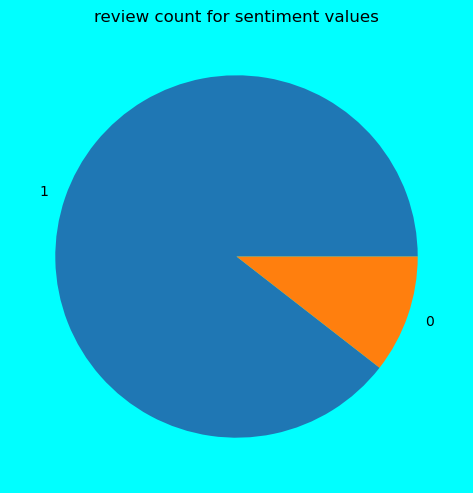

In [32]:
plt.figure(figsize=(8,6),dpi=100,facecolor='cyan')
plt.pie(review.sentiments.value_counts(), labels=review.sentiments.value_counts().index)
plt.title("review count for sentiment values")
plt.show()

<AxesSubplot:ylabel='sentiments'>

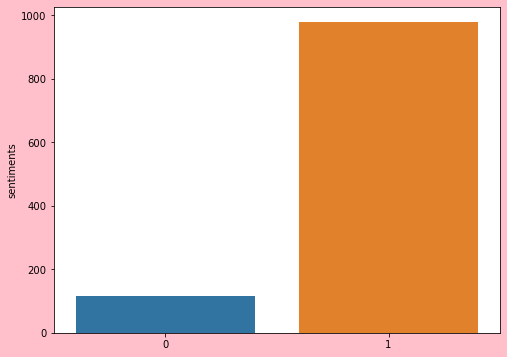

In [33]:
plt.figure(figsize=(8,6),facecolor='pink')
sns.barplot(x=review.sentiments.value_counts().index, y=review.sentiments.value_counts())

In [34]:
review['word_count'] = review['Review'].apply(lambda x: len(str(x).split()))

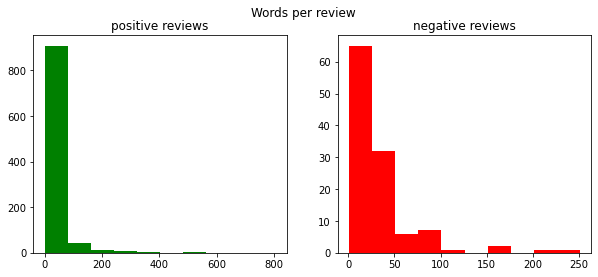

In [35]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
review_words=review[review['sentiments']==1]['word_count']
ax1.hist(review_words,color='green')
ax1.set_title('positive reviews')
review_words=review[review['sentiments']==0]['word_count']
ax2.hist(review_words,color='red')
ax2.set_title('negative reviews')
fig.suptitle('Words per review')
plt.show()

In [41]:
review=pd.read_csv("c:\\Users\\HP\\Documents\\kaggle\\project Data Science\\Untitled Folder\\clear+reviews.csv",index_col=0)

In [42]:
most_negative_reviews=review.sort_values(by='polarity')

In [43]:
most_positive_reviews=review.sort_values(by='polarity',ascending= False)

In [44]:
most_positive_reviews.sort_values('word_count').tail(6)

,Review,Rating,polarity,sentiments,word_count
44,i used to use an android phone till and wa...,4,0.199966,1,289
8,when the iphone prices were announced i wa...,5,0.160432,1,318
763,i have been an android power user for year...,5,0.254613,1,361
20,this is going to be a long review sit back r...,5,0.220667,1,371
767,the iphone is the fanciest smart phone in ...,5,0.254610,1,562
753,given a star as apple continues to sell a ...,1,0.035020,1,805


## Model Building

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [50]:
cv=CountVectorizer(binary=True)

In [52]:
X =cv.fit_transform(review["Review"]).toarray()

In [54]:
y=review.sentiments

In [55]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [56]:
sm = SMOTE(random_state = 2)

In [57]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [58]:
target=pd.DataFrame({'y':y_train_res})

<AxesSubplot:ylabel='y'>

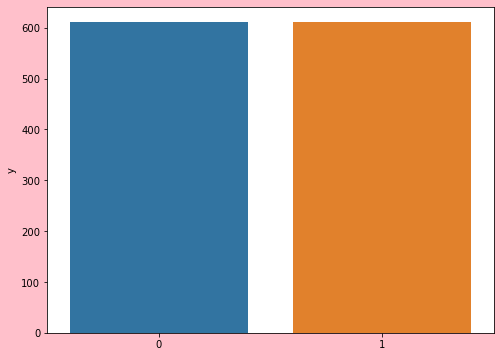

In [59]:
plt.figure(figsize=(8,6),facecolor='pink')
sns.barplot(x=target.y.value_counts().index, y=target.y.value_counts())

In [67]:
from sklearn.naive_bayes import BernoulliNB , GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [61]:
model_bnb = BernoulliNB()
model_gnb= GaussianNB()
model_mnb= MultinomialNB()

[[ 2 12]
 [79 77]]


              precision    recall  f1-score   support

           0       0.02      0.14      0.04        14
           1       0.87      0.49      0.63       156

    accuracy                           0.46       170
   macro avg       0.44      0.32      0.34       170
weighted avg       0.80      0.46      0.58       170

0.8651685393258427
0.4935897435897436
0.6285714285714286
0.4647058823529412


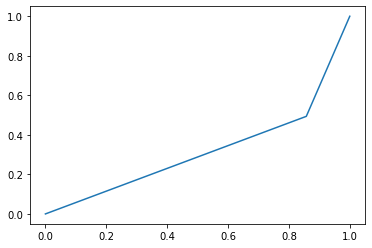

In [78]:
model_bnb.fit(X_train_res, y_train_res)
y_pred = model_bnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(accuracy_score(y_test, y_pred))

[[  1  13]
 [ 26 130]]


              precision    recall  f1-score   support

           0       0.04      0.07      0.05        14
           1       0.91      0.83      0.87       156

    accuracy                           0.77       170
   macro avg       0.47      0.45      0.46       170
weighted avg       0.84      0.77      0.80       170

0.9090909090909091
0.8333333333333334
0.8695652173913043
0.7705882352941177


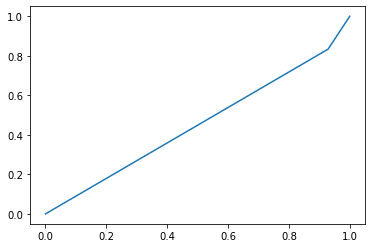

In [79]:
model_gnb.fit(X_train_res, y_train_res)
y_pred = model_gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(accuracy_score(y_test, y_pred))

[[  4  10]
 [ 17 139]]


              precision    recall  f1-score   support

           0       0.19      0.29      0.23        14
           1       0.93      0.89      0.91       156

    accuracy                           0.84       170
   macro avg       0.56      0.59      0.57       170
weighted avg       0.87      0.84      0.86       170

0.9328859060402684
0.8910256410256411
0.9114754098360656
0.8411764705882353


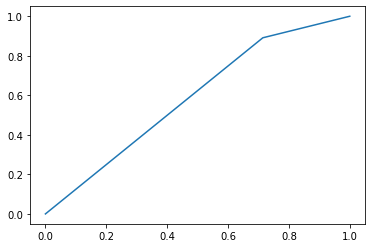

In [80]:
model_mnb.fit(X_train_res, y_train_res)
y_pred = model_mnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(accuracy_score(y_test, y_pred))

[[  4  10]
 [ 21 135]]


              precision    recall  f1-score   support

           0       0.16      0.29      0.21        14
           1       0.93      0.87      0.90       156

    accuracy                           0.82       170
   macro avg       0.55      0.58      0.55       170
weighted avg       0.87      0.82      0.84       170

0.9310344827586207
0.8653846153846154
0.8970099667774087
0.8176470588235294


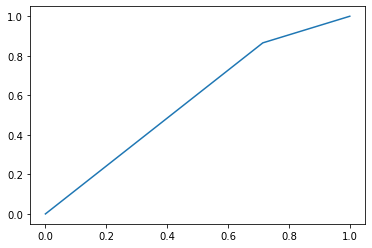

In [81]:
from sklearn.linear_model import LogisticRegression
model_lr= LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)
model_lr.fit(X_train_res, y_train_res)
y_pred =model_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(accuracy_score(y_test, y_pred))

[[  1  13]
 [  9 147]]


              precision    recall  f1-score   support

           0       0.10      0.07      0.08        14
           1       0.92      0.94      0.93       156

    accuracy                           0.87       170
   macro avg       0.51      0.51      0.51       170
weighted avg       0.85      0.87      0.86       170

0.91875
0.9423076923076923
0.930379746835443
0.8705882352941177


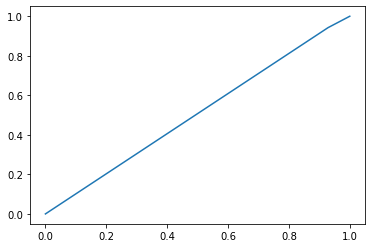

In [82]:
from sklearn.svm import SVC
model_svc = SVC(C=10, kernel='rbf')
model_svc.fit(X_train_res, y_train_res)
y_pred =model_svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(accuracy_score(y_test, y_pred))

[[  0  14]
 [ 13 143]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.91      0.92      0.91       156

    accuracy                           0.84       170
   macro avg       0.46      0.46      0.46       170
weighted avg       0.84      0.84      0.84       170

0.910828025477707
0.9166666666666666
0.9137380191693291
0.8411764705882353


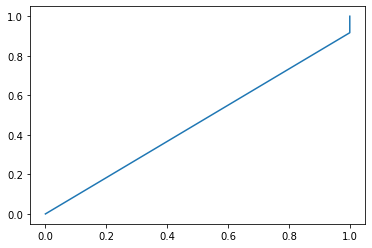

In [83]:
model_rf= RandomForestClassifier(n_estimators=500, random_state=42)
model_rf.fit(X_train_res, y_train_res)
y_pred =model_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(accuracy_score(y_test, y_pred))

[[  5   9]
 [ 13 143]]


              precision    recall  f1-score   support

           0       0.28      0.36      0.31        14
           1       0.94      0.92      0.93       156

    accuracy                           0.87       170
   macro avg       0.61      0.64      0.62       170
weighted avg       0.89      0.87      0.88       170

0.9407894736842105
0.9166666666666666
0.9285714285714286
0.8705882352941177


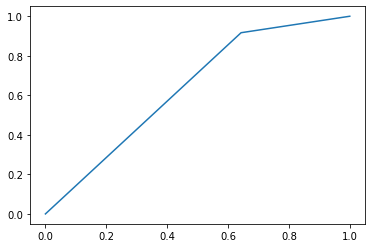

In [84]:
model_ad= AdaBoostClassifier(n_estimators=500 , random_state=42)
model_ad.fit(X_train_res, y_train_res)
y_pred =model_ad.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(accuracy_score(y_test, y_pred))

In [ ]:
model_gb = GradientBoostingClassifier(n_estimators=500, random_state=42,learning_rate=0.01)
model_gb.fit(X_train_res, y_train_res)
y_pred =model_gb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(accuracy_score(y_test, y_pred))

In [ ]:
model_etc= ExtraTreesClassifier(n_estimators=500)
model_etc.fit(X_train_res, y_train_res)
y_pred =model_etc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(accuracy_score(y_test, y_pred))

In [72]:
text = "it is a bad phone"
data=clean_text(text)

In [73]:
cv1=cv.transform([data])

In [74]:
model_mnb.predict(cv1)

array([0], dtype=int64)

In [ ]:
#filename='classifier'
#pickle.dump(model_mnb,open(filename,'wb'))

In [ ]:
#filename='vectorizer'
#pickle.dump(cv,open(filename,'wb'))

In [ ]:
#df1=pickle.load(open(filename,'rb'))